# Linear Classification (Breast Cancer)

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
!nvidia-smi -L

GPU 0: GeForce RTX 2080 Ti (UUID: GPU-3cb47403-efa9-71ae-1700-c27de6cb0d0a)


In [3]:
data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

N, D = X_train.shape

Train on 381 samples, validate on 188 samples
Epoch 1/100
381/381 [==============================] - 0s 1ms/sample - loss: 0.9719 - accuracy: 0.4409 - val_loss: 0.9596 - val_accuracy: 0.4734
Epoch 2/100
381/381 [==============================] - 0s 76us/sample - loss: 0.8968 - accuracy: 0.5013 - val_loss: 0.8845 - val_accuracy: 0.4947
Epoch 3/100
381/381 [==============================] - 0s 74us/sample - loss: 0.8302 - accuracy: 0.5433 - val_loss: 0.8153 - val_accuracy: 0.5638
Epoch 4/100
381/381 [==============================] - 0s 76us/sample - loss: 0.7686 - accuracy: 0.5906 - val_loss: 0.7544 - val_accuracy: 0.5691
Epoch 5/100
381/381 [==============================] - 0s 76us/sample - loss: 0.7149 - accuracy: 0.6378 - val_loss: 0.6989 - val_accuracy: 0.6170
Epoch 6/100
381/381 [==============================] - 0s 78us/sample - loss: 0.6657 - accuracy: 0.6667 - val_loss: 0.6499 - val_accuracy: 0.6489
Epoch 7/100
381/381 [==============================] - 0s 77us/sample - loss: 0

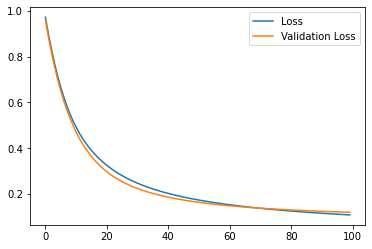

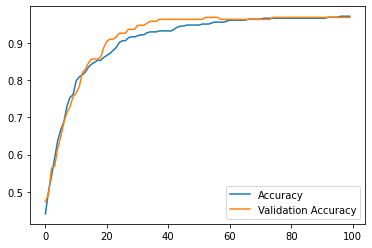

188/188 [==============================] - 0s 48us/sample - loss: 0.1201 - accuracy: 0.9681
Accuracy: 0.9680851101875305


In [4]:
i = tf.keras.layers.Input(shape=(D,))
x = tf.keras.layers.Dense(1, activation='sigmoid')(i)
model = tf.keras.models.Model(i, x)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

r = model.fit(X_train, y_train,
              validation_data=(X_test, y_test),
              epochs=100)

plt.plot(r.history.get('loss'), label='Loss')
plt.plot(r.history.get('val_loss'), label='Validation Loss')
plt.legend()
plt.show()

plt.plot(r.history.get('accuracy'), label='Accuracy')
plt.plot(r.history.get('val_accuracy'), label='Validation Accuracy')
plt.legend()
plt.show()

print(f'Accuracy: {model.evaluate(X_test, y_test)[1]}')

## Save & load the model

In [5]:
model.save('models/linear_classification.h5')
model_loaded = tf.keras.models.load_model('models/linear_classification.h5')
print(f'Accuracy of the loaded model: {model_loaded.evaluate(X_test, y_test)[1]}')

188/188 [==============================] - 0s 297us/sample - loss: 0.1201 - accuracy: 0.9681
Accuracy of the loaded model: 0.9680851101875305
